In [ ]:
'''
importing required libraries to import and perform machine learning on the dataset
'''
import pandas as pd
import numpy as np

#splitting the dataset into training and testing sets 30% testing and 70 percent training
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV

#used to predict to predict continuous variables as there was no categorical data
from sklearn.ensemble import RandomForestRegressor
#Used to improve the model performance  and accuracy of the model
from sklearn.metrics import mean_squared_error
#library used for feature selection because it gives best results for continous variables
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_regression,f_classif
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import mutual_info_regression
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import chi2
from sklearn.feature_selection import RFE
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report  as cls_report,confusion_matrix
from sklearn.metrics import accuracy_score, classification_report  as cls_report,confusion_matrix
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load the renewable energy dataset

# this data has dependent and independent variables
renewable_energy_df = pd.read_csv('/content/drive/MyDrive/DOC-20230529-WA0021_/uk_renewable_energy.csv')
renewable_energy_df

,Year,Energy from renewable & waste sources,Total energy consumption of primary fuels and equivalents,Fraction from renewable sources and waste,Hydroelectric power,"Wind, wave, tidal",Solar photovoltaic,Geothermal aquifers,Landfill gas,Sewage gas,...,Municipal solid waste (MSW),Poultry litter,Straw,Wood,Charcoal,Liquid bio-fuels,Bioethanol,Biodiesel,Biomass,Cross-boundary Adjustment
0,1990,1.647,225.532,0.007,0.448,0.001,0.000,0.001,0.080,0.138,...,0.183,0.000,0.007,0.687,0.039,0.000,0.000,0.000,0.065,0.000
1,1991,1.634,231.288,0.007,0.398,0.001,0.000,0.001,0.105,0.151,...,0.185,0.000,0.007,0.687,0.036,0.000,0.000,0.000,0.065,0.000
2,1992,1.843,228.696,0.008,0.467,0.003,0.000,0.001,0.155,0.151,...,0.210,0.016,0.007,0.736,0.033,0.000,0.000,0.000,0.065,0.000
3,1993,1.862,231.368,0.008,0.370,0.019,0.000,0.001,0.162,0.158,...,0.268,0.043,0.007,0.736,0.034,0.000,0.000,0.000,0.065,0.000
4,1994,2.528,230.739,0.011,0.438,0.030,0.000,0.001,0.188,0.170,...,0.385,0.101,0.007,1.108,0.034,0.000,0.000,0.000,0.065,0.000
5,1995,2.644,230.886,0.011,0.416,0.034,0.000,0.001,0.199,0.193,...,0.411,0.101,0.007,1.182,0.035,0.000,0.000,0.000,0.065,0.000
6,1996,2.581,243.392,0.011,0.292,0.042,0.000,0.001,0.249,0.193,...,0.396,0.101,0.007,1.194,0.041,0.000,0.000,0.000,0.065,0.000
7,1997,2.611,240.756,0.011,0.378,0.057,0.000,0.001,0.317,0.192,...,0.465,0.101,0.007,0.991,0.038,0.000,0.000,0.000,0.065,0.000
8,1998,3.013,246.790,0.012,0.440,0.075,0.000,0.001,0.402,0.181,...,0.649,0.112,0.007,1.077,0.040,0.000,0.000,0.000,0.029,0.000
9,1999,3.148,246.112,0.013,0.459,0.073,0.000,0.001,0.572,0.189,...,0.633,0.148,0.007,0.959,0.033,0.000,0.000,0.000,0.074,0.000


In [ ]:
# Load the CO2 emissions dataset
co2_emissions_df = pd.read_csv('/content/drive/MyDrive/DOC-20230529-WA0021_/GCB2022v27_MtCO2_flat.csv')
co2_emissions_df

,Country,ISO 3166-1 alpha-3,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
0,Afghanistan,AFG,1750,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,1751,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,1752,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,AFG,1753,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,AFG,1754,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
63099,Global,WLD,2017,36096.739276,14506.973805,12242.627935,7144.928128,1507.923185,391.992176,302.294047,4.749682
63100,Global,WLD,2018,36826.506600,14746.830688,12266.016285,7529.846784,1569.218392,412.115746,302.478706,4.792753
63101,Global,WLD,2019,37082.558969,14725.978025,12345.653374,7647.528220,1617.506786,439.253991,306.638573,4.775633
63102,Global,WLD,2020,35264.085734,14174.564010,11191.808551,7556.290283,1637.537532,407.583673,296.301685,4.497423


In [ ]:
# Merge the datasets on the common column 'Year' as it is similar in both files
merged_df = pd.merge(renewable_energy_df, co2_emissions_df, on='Year')
merged_df

,Year,Energy from renewable & waste sources,Total energy consumption of primary fuels and equivalents,Fraction from renewable sources and waste,Hydroelectric power,"Wind, wave, tidal",Solar photovoltaic,Geothermal aquifers,Landfill gas,Sewage gas,...,Country,ISO 3166-1 alpha-3,Total,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
0,1990,1.647,225.532,0.007,0.448,0.001,0.000,0.001,0.08,0.138,...,Afghanistan,AFG,2.024326,0.278464,1.271408,0.403040,0.045766,0.025648,NaN,0.189281
1,1990,1.647,225.532,0.007,0.448,0.001,0.000,0.001,0.08,0.138,...,Albania,ALB,5.520602,2.498848,2.172752,0.465328,0.383674,0.000000,NaN,1.675415
2,1990,1.647,225.532,0.007,0.448,0.001,0.000,0.001,0.08,0.138,...,Algeria,DZA,76.737628,2.942192,23.204112,38.908016,2.988636,8.694672,NaN,3.007187
3,1990,1.647,225.532,0.007,0.448,0.001,0.000,0.001,0.08,0.138,...,Andorra,AND,0.406704,0.000000,0.406704,0.000000,0.000000,0.000000,NaN,7.592152
4,1990,1.647,225.532,0.007,0.448,0.001,0.000,0.001,0.08,0.138,...,Angola,AGO,5.089864,0.000000,2.475087,1.010539,0.106737,1.497501,NaN,0.430300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7187,2020,24.472,169.439,0.144,0.580,6.481,1.131,0.001,1.16,0.440,...,Yemen,YEM,12.140133,0.279686,9.359764,0.197557,0.663596,1.639529,NaN,0.376041
7188,2020,24.472,169.439,0.144,0.580,6.481,1.131,0.001,1.16,0.440,...,Zambia,ZMB,7.280663,2.291770,4.027911,0.000000,0.960983,0.000000,NaN,0.384656
7189,2020,24.472,169.439,0.144,0.580,6.481,1.131,0.001,1.16,0.440,...,Zimbabwe,ZWE,10.607897,6.721571,3.316712,0.000000,0.569615,0.000000,NaN,0.676970
7190,2020,24.472,169.439,0.144,0.580,6.481,1.131,0.001,1.16,0.440,...,International Transport,XIT,938.508679,NaN,938.508679,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Handle missing values in CO2 emissions columns - these were checked manually
# simple imputter is use to add the missing values by using the mean stragey for different columns
imputer = SimpleImputer(strategy='mean')
merged_df[['Coal', 'Oil', 'Gas', 'Cement', 'Flaring', 'Other', 'Per Capita']] = imputer.fit_transform(
    merged_df[['Coal', 'Oil', 'Gas', 'Cement', 'Flaring', 'Other', 'Per Capita']])
merged_df

,Year,Energy from renewable & waste sources,Total energy consumption of primary fuels and equivalents,Fraction from renewable sources and waste,Hydroelectric power,"Wind, wave, tidal",Solar photovoltaic,Geothermal aquifers,Landfill gas,Sewage gas,...,Country,ISO 3166-1 alpha-3,Total,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
0,1990,1.647,225.532,0.007,0.448,0.001,0.000,0.001,0.08,0.138,...,Afghanistan,AFG,2.024326,0.278464,1.271408,0.403040,0.045766,0.025648,10.653255,0.189281
1,1990,1.647,225.532,0.007,0.448,0.001,0.000,0.001,0.08,0.138,...,Albania,ALB,5.520602,2.498848,2.172752,0.465328,0.383674,0.000000,10.653255,1.675415
2,1990,1.647,225.532,0.007,0.448,0.001,0.000,0.001,0.08,0.138,...,Algeria,DZA,76.737628,2.942192,23.204112,38.908016,2.988636,8.694672,10.653255,3.007187
3,1990,1.647,225.532,0.007,0.448,0.001,0.000,0.001,0.08,0.138,...,Andorra,AND,0.406704,0.000000,0.406704,0.000000,0.000000,0.000000,10.653255,7.592152
4,1990,1.647,225.532,0.007,0.448,0.001,0.000,0.001,0.08,0.138,...,Angola,AGO,5.089864,0.000000,2.475087,1.010539,0.106737,1.497501,10.653255,0.430300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7187,2020,24.472,169.439,0.144,0.580,6.481,1.131,0.001,1.16,0.440,...,Yemen,YEM,12.140133,0.279686,9.359764,0.197557,0.663596,1.639529,10.653255,0.376041
7188,2020,24.472,169.439,0.144,0.580,6.481,1.131,0.001,1.16,0.440,...,Zambia,ZMB,7.280663,2.291770,4.027911,0.000000,0.960983,0.000000,10.653255,0.384656
7189,2020,24.472,169.439,0.144,0.580,6.481,1.131,0.001,1.16,0.440,...,Zimbabwe,ZWE,10.607897,6.721571,3.316712,0.000000,0.569615,0.000000,10.653255,0.676970
7190,2020,24.472,169.439,0.144,0.580,6.481,1.131,0.001,1.16,0.440,...,International Transport,XIT,938.508679,105.950721,938.508679,50.247726,9.537708,2.976796,10.653255,4.678985


In [ ]:
# Select relevant columns for modeling
# select the features - independent variables needed to predict the outcome
features = ['Energy from renewable & waste sources', 'Total energy consumption of primary fuels and equivalents',
            'Fraction from renewable sources and waste', 'Hydroelectric power', 'Wind, wave, tidal',
            'Solar photovoltaic', 'Geothermal aquifers', 'Landfill gas', 'Sewage gas', 'Biogas from autogen',
            'Municipal solid waste (MSW)', 'Poultry litter', 'Straw', 'Wood', 'Charcoal', 'Liquid bio-fuels',
            'Bioethanol', 'Biodiesel', 'Biomass', 'Cross-boundary Adjustment','Coal','Oil','Cement','Gas','Flaring','Other','Per Capita','Year']
target = 'Total'  # Total CO2 emissions - this is our outcome variable


In [ ]:
# Split the data into training and testing sets using a testing ratio of 30%
X = merged_df[features]
y = merged_df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X,y
#X_train,X_test,y_train,y_test

(      Energy from renewable & waste sources  \
 0                                     1.647   
 1                                     1.647   
 2                                     1.647   
 3                                     1.647   
 4                                     1.647   
 ...                                     ...   
 7187                                 24.472   
 7188                                 24.472   
 7189                                 24.472   
 7190                                 24.472   
 7191                                 24.472   
 
       Total energy consumption of primary fuels and equivalents  \
 0                                               225.532           
 1                                               225.532           
 2                                               225.532           
 3                                               225.532           
 4                                               225.532           
 ...          

In [ ]:
# model 1: Linear Regression used for continuous variables
lr_classifier = LinearRegression()
lr_classifier.fit(X_train, y_train)
lr_y_val_pred = lr_classifier.predict(X_test) #in X_test we have independent testing variables
df_preds = pd.DataFrame({'Actual': y_test.squeeze(), 'Predicted': lr_y_val_pred.squeeze()})
print(df_preds)

           Actual    Predicted
4054     1.835383   -17.074678
3813  1267.623958  1245.025299
5065    14.886152    -3.140043
4339    60.106794    40.451452
1615     0.084272   -22.235213
...           ...          ...
1224     2.505953   -18.872503
142      0.721436   -24.486161
1490    51.935752    44.161049
4502   401.957338   383.264886
3169     0.000000   244.866439

[2158 rows x 2 columns]


In [ ]:
#checking the accuracy of the model using mean square error
mae = mean_absolute_error(y_test, lr_y_val_pred)
mse = mean_squared_error(y_test, lr_y_val_pred)
rmse = np.sqrt(mse)
print(f'Mean absolute error: {mae:.2f}')
print(f'Mean squared error: {mse:.2f}')
print(f'Root mean squared error: {rmse:.2f}')

Mean absolute error: 28.32
Mean squared error: 3350.28
Root mean squared error: 57.88


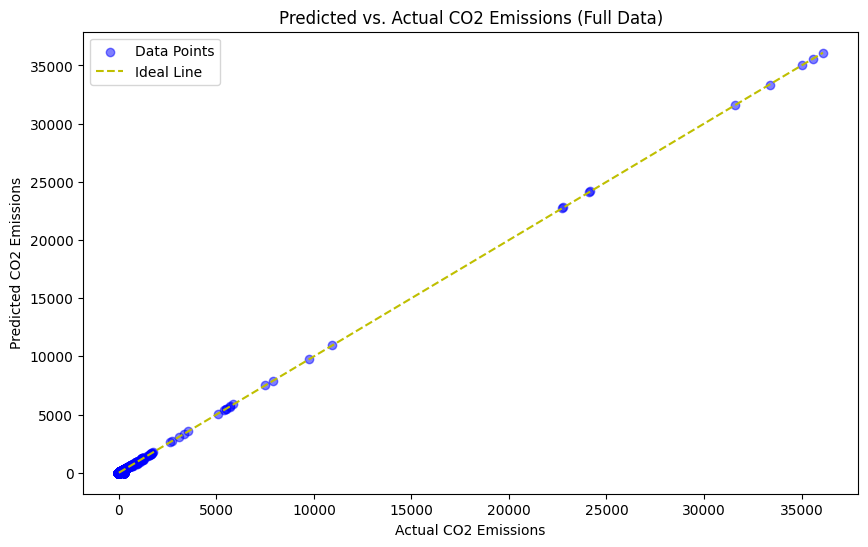

In [ ]:
# Visualize the predicted CO2 emissions vs. actual CO2 emissions
plt.figure(figsize=(10, 6))
plt.scatter(lr_y_val_pred, y_test, color='b', alpha=0.5, label='Data Points')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='y', linestyle='--', label='Ideal Line')
plt.xlabel('Actual CO2 Emissions')
plt.ylabel('Predicted CO2 Emissions')
plt.title('Predicted vs. Actual CO2 Emissions (Full Data)')
plt.legend()
plt.show()

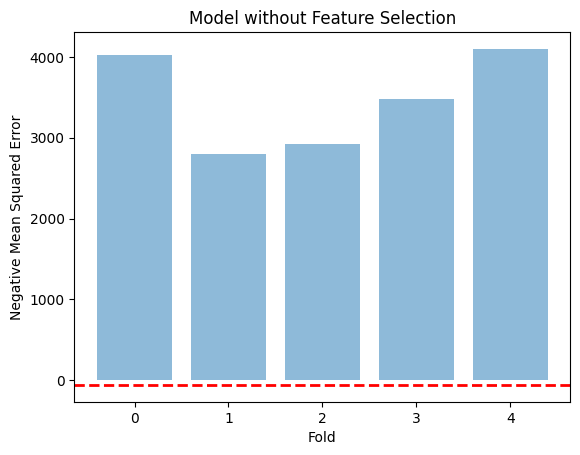

In [ ]:
# Step 4: Cross-validation and evaluation of the above model
# used to test and train the model on different iterations and this is performed on the full dataset
scores_model = cross_val_score(lr_classifier, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
rmse_model = np.sqrt(-scores_model.mean())
fig, ax = plt.subplots()

# Bar plot for Model without Feature Selection
ax.bar(range(len(scores_model)), -scores_model, alpha=0.5)
ax.axhline(y=-rmse, color='red', linestyle='--', linewidth=2)
ax.set_xlabel("Fold")
ax.set_ylabel("Negative Mean Squared Error")
ax.set_title("Model without Feature Selection")
plt.show()


In [ ]:
# Step 3: Model with feature selection
selector = SelectKBest(score_func=f_regression, k=10)  # Adjust k as needed i.e. we used 10 as it is a standard value for this dataset
X_selected = selector.fit_transform(X_train, y_train)
selected_features = X_train.columns[selector.get_support()]
model_fs = LinearRegression()
model_fs.fit(X_selected, y_train)

LinearRegression()

In [ ]:
#Check mean square error for the feature selection task
X_selected_fs = selector.transform(X_train)
scores_model_fs = cross_val_score(model_fs, X_selected_fs, y_train, cv=5, scoring='neg_mean_squared_error')
rmse_model_fs = np.sqrt(-scores_model_fs.mean())
std_rmse_model_fs = scores_model_fs.std()

In [ ]:
print("RMSE (Model with feature selection): {:.2f}".format(rmse_model_fs))
print("Standard Deviation of RMSE (Model with feature selection): {:.2f}".format(std_rmse_model_fs))

RMSE (Model with feature selection): 58.71
Standard Deviation of RMSE (Model with feature selection): 539.44


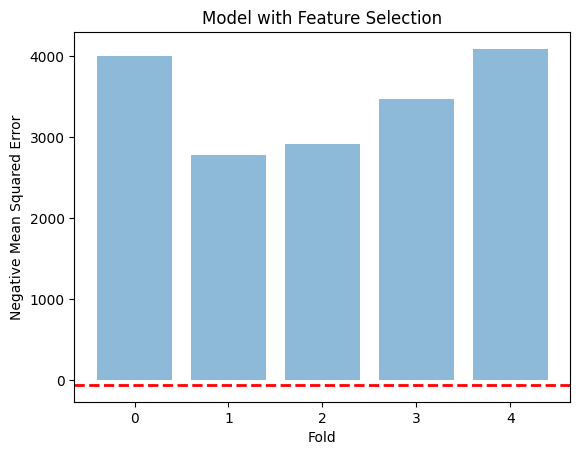

In [ ]:
# Bar plot for Model with Feature Selection
fig, ax = plt.subplots()
ax.bar(range(len(scores_model_fs)), -scores_model_fs, alpha=0.5)
ax.axhline(y=-rmse_model_fs, color='red', linestyle='--', linewidth=2)
ax.set_xlabel("Fold")
ax.set_ylabel("Negative Mean Squared Error")
ax.set_title("Model with Feature Selection")
plt.show()

In [ ]:
# Second model: Random Forest Regressor on Full Data
model_full = RandomForestRegressor()
model_full.fit(X_train, y_train)
y_pred_full = model_full.predict(X_test)
mse_full = mean_squared_error(y_test, y_pred_full)
r2_full = r2_score(y_test, y_pred_full)

In [ ]:
print("Model 1 (Full data):")
print("   Mean Squared Error:", mse_full)
print("   R-squared Score:", r2_full)

Model 1 (Full data):
   Mean Squared Error: 1758.5254382984608
   R-squared Score: 0.999563116248914


In [ ]:
# Perform k-fold cross-validation for the full model
full_model_scores = cross_val_score(model_full, X, y, cv=5, scoring='r2')
print("Full Model Cross-Validation Scores:")
print(full_model_scores)
print("Mean R^2 Score (Full Model):", np.mean(full_model_scores))

Full Model Cross-Validation Scores:
[0.97515802 0.99947905 0.99648685 0.99922374 0.99017591]
Mean R^2 Score (Full Model): 0.9921047138227361


Support Vector Machine Regression RMSE: 2011.74


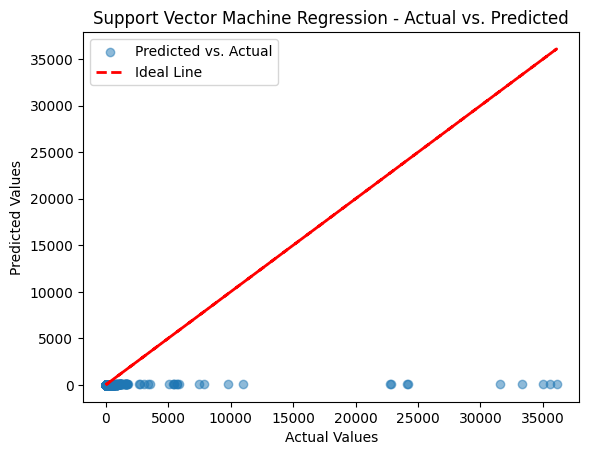

In [ ]:
#Third Model:  Create an SVR model
svm_regressor = SVR()

# Fit the model on the training data
svm_regressor.fit(X_train, y_train)

# Predict on the validation set
y_val_pred = svm_regressor.predict(X_test)

# Calculate the root mean squared error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_val_pred))
print("Support Vector Machine Regression RMSE: {:.2f}".format(rmse))

# Plot the predicted values vs. the actual values
plt.scatter(y_test, y_val_pred, alpha=0.5, label='Predicted vs. Actual')
plt.plot(y_test, y_test, color='red', linestyle='--', linewidth=2, label='Ideal Line')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Support Vector Machine Regression - Actual vs. Predicted")
plt.legend()
plt.show()

In [ ]:
# Step 2: Feature Selection
selector = SelectKBest(score_func=f_regression, k=10)  # Adjust k as needed
X_selected = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()]
# Display the names of the selected features
for feature in selected_features:
    print(feature)

Sewage gas
Bioethanol
Coal
Oil
Cement
Gas
Flaring
Other
Per Capita
Year


In [ ]:
# Split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


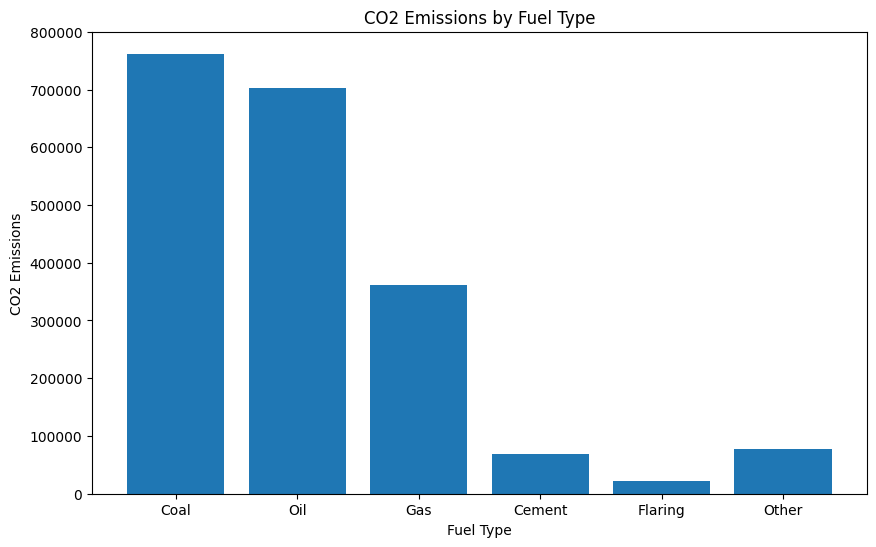

In [ ]:
##Bar Plot of CO2 Emissions by Fuel Type
fuel_types = ['Coal', 'Oil', 'Gas', 'Cement', 'Flaring', 'Other']
emissions = [merged_df['Coal'].sum(), merged_df['Oil'].sum(), merged_df['Gas'].sum(),
             merged_df['Cement'].sum(), merged_df['Flaring'].sum(), merged_df['Other'].sum()]

plt.figure(figsize=(10, 6))
plt.bar(fuel_types, emissions)
plt.xlabel('Fuel Type')
plt.ylabel('CO2 Emissions')
plt.title('CO2 Emissions by Fuel Type')
plt.grid(False)
plt.show()

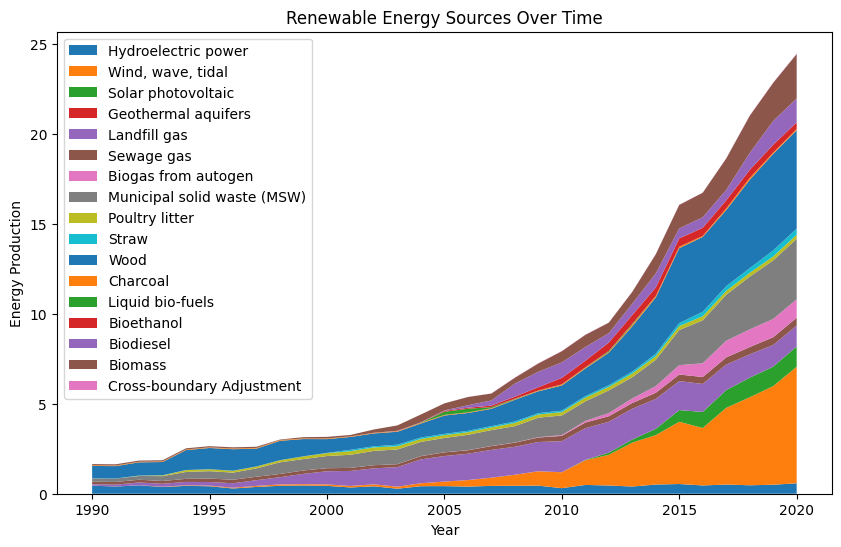

In [ ]:
#Stacked Area Plot of Renewable Energy Sources Over Time on full dataset
renewable_sources = ['Hydroelectric power', 'Wind, wave, tidal', 'Solar photovoltaic',
                     'Geothermal aquifers', 'Landfill gas', 'Sewage gas', 'Biogas from autogen',
                     'Municipal solid waste (MSW)', 'Poultry litter', 'Straw', 'Wood', 'Charcoal',
                     'Liquid bio-fuels', 'Bioethanol', 'Biodiesel', 'Biomass', 'Cross-boundary Adjustment']

plt.figure(figsize=(10, 6))
plt.stackplot(merged_df['Year'], [merged_df[source] for source in renewable_sources], labels=renewable_sources)
plt.xlabel('Year')
plt.ylabel('Energy Production')
plt.title('Renewable Energy Sources Over Time')
plt.legend(loc='upper left')
plt.grid(False)
plt.show()

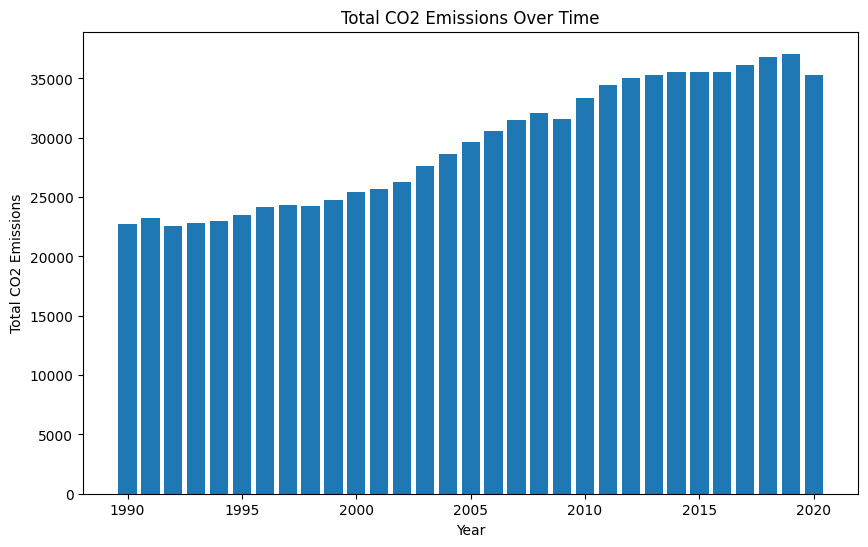

In [ ]:
#Line Plot of Total CO2 Emissions Over Time
plt.figure(figsize=(10, 6))
plt.bar(merged_df['Year'], merged_df['Total'])
plt.xlabel('Year')
plt.ylabel('Total CO2 Emissions')
plt.title('Total CO2 Emissions Over Time')
plt.grid(False)
plt.show()

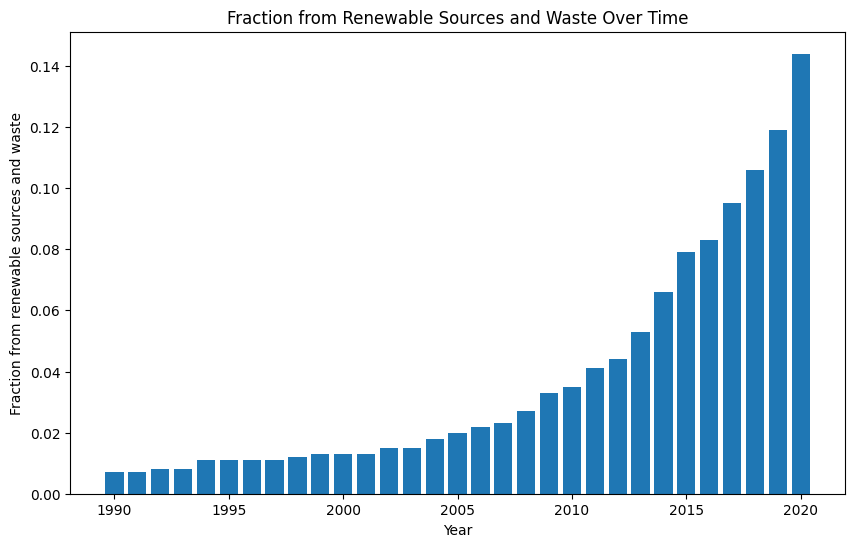

In [ ]:
#Bar Plot of Fraction from Renewable Sources and Waste
plt.figure(figsize=(10, 6))
plt.bar(merged_df['Year'], merged_df['Fraction from renewable sources and waste'])
plt.xlabel('Year')
plt.ylabel('Fraction from renewable sources and waste')
plt.title('Fraction from Renewable Sources and Waste Over Time')
plt.grid(False)
plt.show()

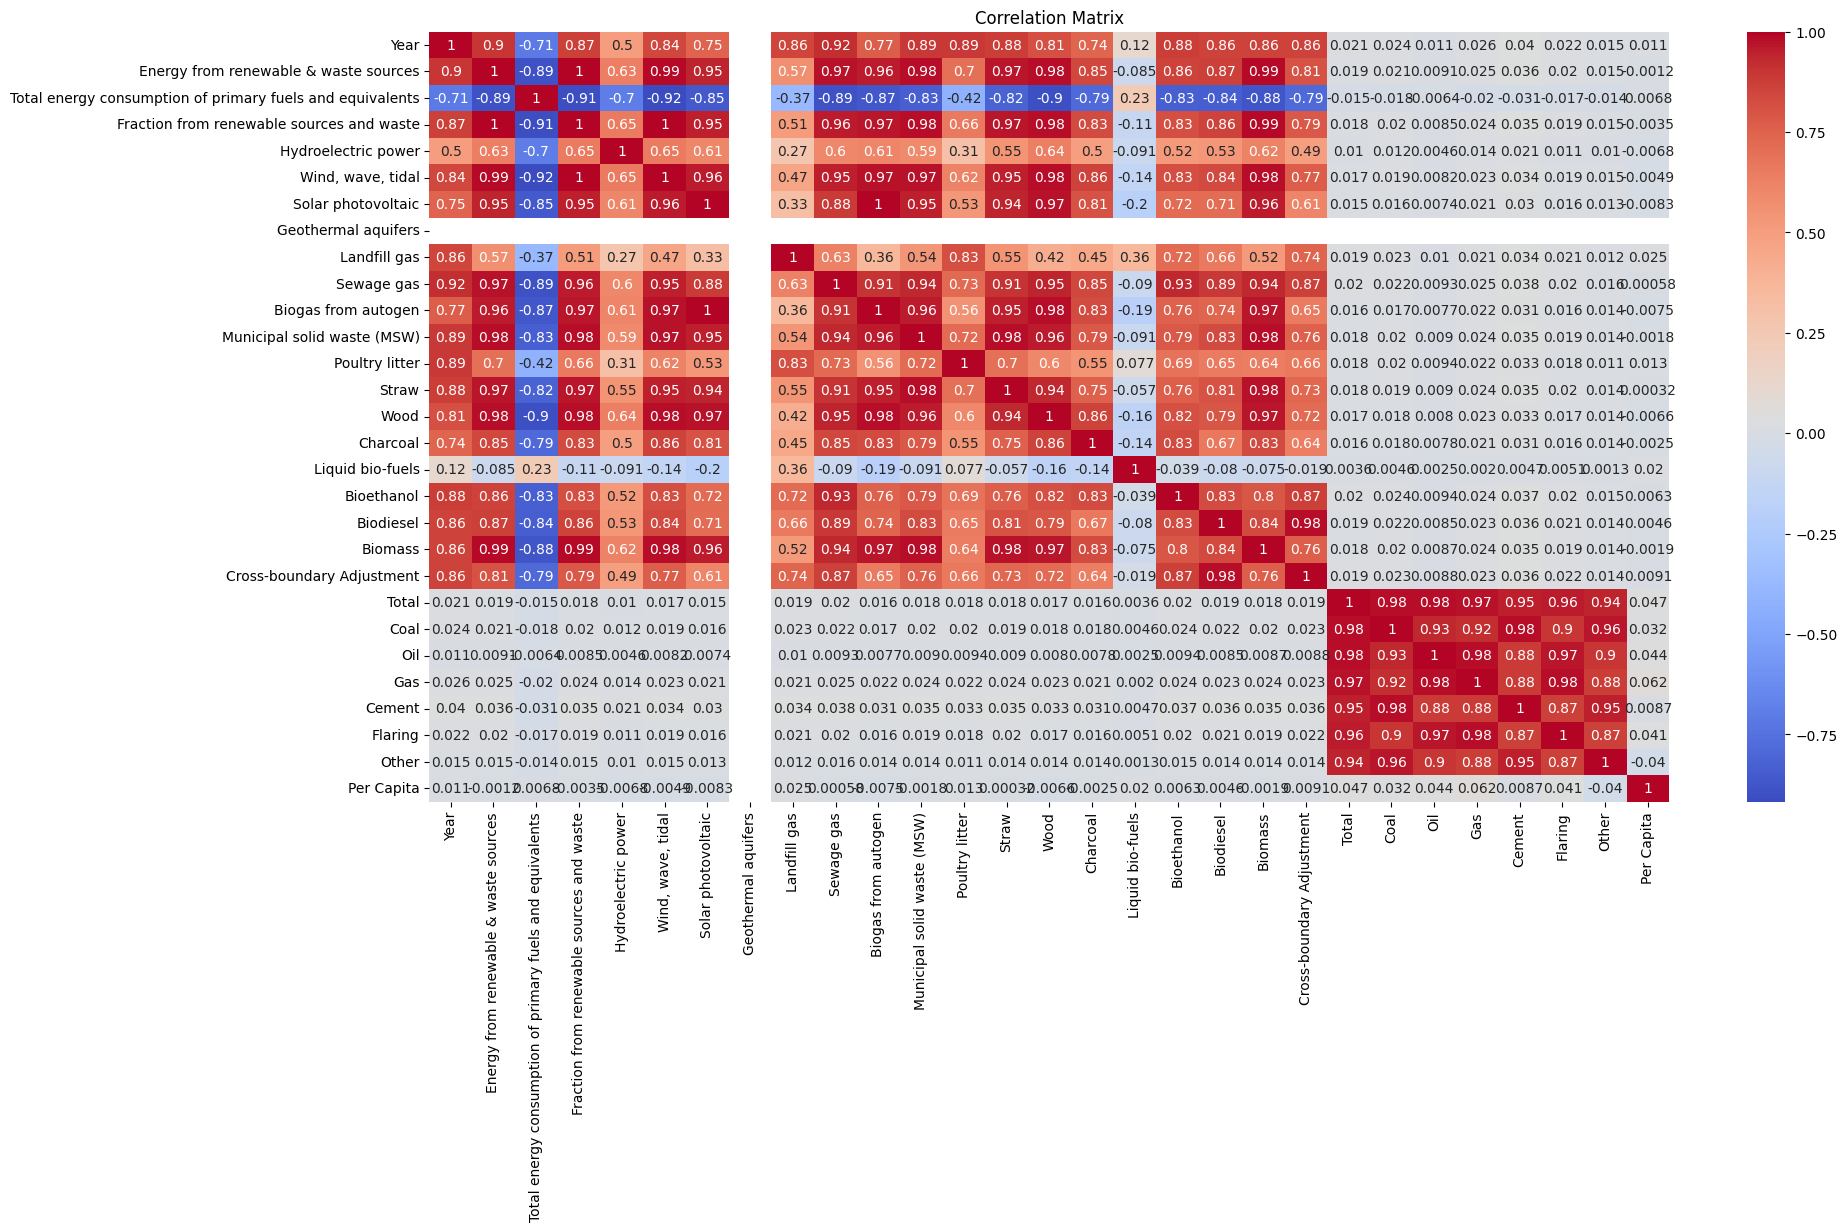

In [ ]:
#Heatmap of Correlation Matrix
numeric_columns = merged_df.select_dtypes(include=np.number)
corr_matrix = numeric_columns.corr()

plt.figure(figsize=(20, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()